## Machine Learning Project

## Wine Quality Prediction for Red Wine and White Wine by using Logestic Regression and Naive Bayes Algorithms

## Red Wine

In [1]:
#Importing all the libraries

import pandas as pd
import matplotlib.pyplot as plt
import scikitplot as skplt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score


In [2]:
#laoding the Red wine csv file 

wine_quality = pd.read_csv("winequality-red.csv")
wine_quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# Checking for categorical values

wine_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
# Checking the summary of the Red wine data set

wine_quality.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Data Preprocessing

#### Data preprocessing for Red wine data set 

In [5]:
# Checking for Null Values in Red wine data set

wine_quality.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
# Checking for duplicate rows in the Red Wine data set

wine_quality=wine_quality.drop_duplicates()
wine_quality

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [7]:
# Renaming the column names by placing "_" in between the spaces

wine_quality = wine_quality.rename(columns={'fixed acidity':'fixed_acidity','residual sugar':'residual_sugar','free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide','citric acid':'citric_acid','volatile acidity':'volatile_acidity'})
wine_quality.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [8]:
# Checking the column names if changed or not 

wine_quality.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [9]:
# Creating a copy of the dataset red wine

wine_quality_Red = wine_quality.copy()

wine_quality_Red

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [10]:
# Checking the Unique elements of Quality

wine_quality['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [11]:
# Creating a Rating column for binomial classification of target variable "quality"

conditions = [
    (wine_quality_Red['quality'] >= 6),
    (wine_quality_Red['quality'] < 6)
]
rating = [1,0]
wine_quality_Red['rating'] = np.select(conditions, rating)

In [12]:
# Checking the Red wine data set head for the Binomial classification 

wine_quality_Red.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,rating
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0


In [13]:
# Checking the rating column mean

wine_quality_Red.groupby('rating').mean()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
rating,,,,,,,,,,,,
0,8.141719,0.592930,0.237547,2.526797,0.094144,16.659375,55.146094,0.997044,3.309016,0.620484,9.920781,4.885937
1,8.460918,0.472997,0.303296,2.520376,0.082765,15.211405,39.420028,0.996411,3.310473,0.692726,10.887645,6.279555


In [14]:
# Separating the feature variables and the target variable

X_wine_quality = wine_quality_Red.drop(['quality','rating'], axis = 1)
y_wine_quality = wine_quality_Red['rating']


In [15]:
# Checking the X value head

X_wine_quality.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4


In [16]:
# Checking the Target variable head y

y_wine_quality.head()

0    0
1    0
2    0
3    1
5    0
Name: rating, dtype: int64

In [17]:
# Checking the good and bad quality of wine count

wine_quality_Red['rating'].value_counts()

1    719
0    640
Name: rating, dtype: int64

In [18]:
# Normalizing feature variables to bring them to same scale

X_wine_quality = StandardScaler().fit_transform(X_wine_quality)

For the regression methods, we would use the the datasets as it is and predict its quality

## Data Model on Red Wine 

#### Using Logestic regression

In [19]:
# importing all libararies for data modelling 

import matplotlib.pyplot as plt
import scikitplot as skplt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

import statsmodels.api as sm

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.metrics import roc_curve, roc_auc_score

In [20]:
# Training and test data in the ration of 7:3

X_wine_train, X_wine_test, Y_wine_train, Y_wine_test = train_test_split(X_wine_quality, y_wine_quality, test_size = 0.3, random_state = 3)


In [21]:
# Checking shape of the testing and training data set

print(X_wine_train.shape,X_wine_test.shape,Y_wine_train.shape,Y_wine_test.shape)

(951, 11) (408, 11) (951,) (408,)


In [22]:
logistic = LogisticRegression(penalty='l2', C=1.0, random_state=None, solver='saga')
logistic.fit(X_wine_train,Y_wine_train)

LogisticRegression(solver='saga')

In [23]:
# Calculating the probablity of prediction

y_pred = logistic.predict(X_wine_test)
y_pred_p = logistic.predict_proba(X_wine_test)
print(y_pred)

[0 1 1 1 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 1 0
 0 1 0 0 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 1 1 0 1 0
 1 0 0 1 0 0 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1
 0 1 0 1 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0
 1 1 1 0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1 0
 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 0
 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0
 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 0 0 0 0 1
 0 0 0 1 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1
 0 1 1 0 0 0 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1
 0 1 1 0 1 0 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0
 1]


In [24]:
# Importing scikit-learn metrics module for accuracy calculation

from sklearn import metrics

# Model Accuracy, how often is the classifier correct?

print("Accuracy:",metrics.accuracy_score(Y_wine_test,y_pred))

Accuracy: 0.75


In [25]:
# Calculating the Confusion matrix

confmat = pd.DataFrame(confusion_matrix(Y_wine_test, y_pred), 
                       index=['True[0]', 'True[1]'], columns=['Predict[0]', 'Predict[1]'])
print("Confusion Matrix")
print(confmat)

Confusion Matrix
         Predict[0]  Predict[1]
True[0]         157          49
True[1]          53         149


In [26]:
# Calculating the f1 score

f1_score(Y_wine_test, y_pred)

0.745

In [27]:
# Calculating the Precision score 

precision_score(Y_wine_test, y_pred)

0.7525252525252525

In [28]:
# Calculating 

recall_score(Y_wine_test, y_pred)

0.7376237623762376

In [29]:
# Comparing all the metric values together

print(classification_report(Y_wine_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.76      0.75       206
           1       0.75      0.74      0.74       202

    accuracy                           0.75       408
   macro avg       0.75      0.75      0.75       408
weighted avg       0.75      0.75      0.75       408



In [30]:
# Calculating the roc_auc score 

roc_auc_score(Y_wine_test, y_pred_p[:,1])  #For true class i.e 1


0.8218062097471883

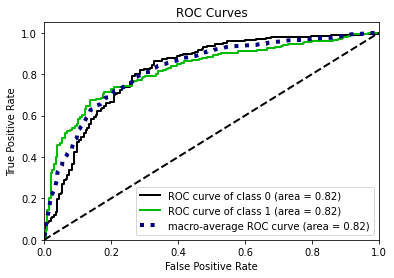

In [31]:
# Plotting the Roc curve for O and 1

skplt.metrics.plot_roc(Y_wine_test, logistic.predict_proba(X_wine_test), plot_micro=False)
plt.show()

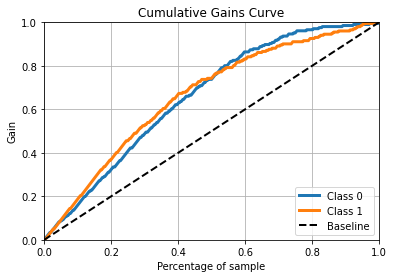

In [32]:
# Plotting the Cumulative gain curve for O and 1

skplt.metrics.plot_cumulative_gain(Y_wine_test, logistic.predict_proba(X_wine_test))
plt.show()

#### Hyperparameter

In [33]:
model_grid = {'C' : [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0], 'penalty' : ['l1', 'l2']}
logReg = LogisticRegression(random_state = None, solver = 'saga')

logReg_CV = GridSearchCV(logReg, model_grid, cv = 30)
logReg_CV.fit(X_wine_train,Y_wine_train)


GridSearchCV(cv=30, estimator=LogisticRegression(solver='saga'),
             param_grid={'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0],
                         'penalty': ['l1', 'l2']})

In [34]:
logReg_CV.best_score_

0.7346774193548388

In [35]:
logReg_CV.best_params_

{'C': 0.1, 'penalty': 'l1'}

In [36]:
y_pred_CV = logReg_CV.predict(X_wine_test)
y_pred_p_CV = logReg_CV.predict_proba(X_wine_test)

In [37]:
# Importing scikit-learn metrics module for accuracy calculation

from sklearn import metrics

# Model Accuracy, how often is the classifier correct?

print("Accuracy:",metrics.accuracy_score(Y_wine_test,y_pred_CV))


Accuracy: 0.7524509803921569


In [38]:
# Calculating the Confusion matrix

confmat = pd.DataFrame(confusion_matrix(Y_wine_test, y_pred_CV), 
                       index=['True[0]', 'True[1]'], columns=['Predict[0]', 'Predict[1]'])
print("Confusion Matrix")
print(confmat)

Confusion Matrix
         Predict[0]  Predict[1]
True[0]         156          50
True[1]          51         151


In [39]:
# Calculating the f1 score

f1_score(Y_wine_test, y_pred_CV)

0.749379652605459

In [40]:
# Calculating the Precision score 

precision_score(Y_wine_test, y_pred_CV)


0.7512437810945274

In [41]:

# Calculating 

recall_score(Y_wine_test, y_pred_CV)

0.7475247524752475

In [42]:
# Comparing all the metric values together

print(classification_report(Y_wine_test, y_pred_CV))

              precision    recall  f1-score   support

           0       0.75      0.76      0.76       206
           1       0.75      0.75      0.75       202

    accuracy                           0.75       408
   macro avg       0.75      0.75      0.75       408
weighted avg       0.75      0.75      0.75       408



In [43]:
# Calculating the roc_auc score 

roc_auc_score(Y_wine_test, y_pred_p_CV[:,1])  #For true class i.e 1

0.8213496106892244

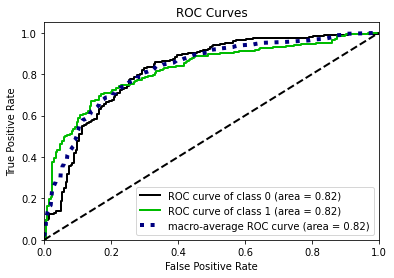

In [44]:
# Plotting the Roc curve for O and 1

skplt.metrics.plot_roc(Y_wine_test, logReg_CV.predict_proba(X_wine_test), plot_micro=False)
plt.show()

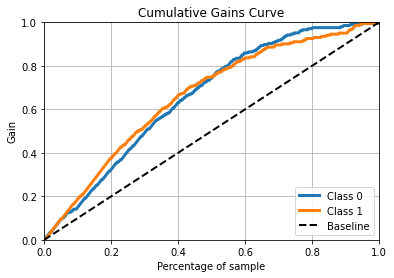

In [45]:
# Plotting the Cumulative gain curve for O and 1

skplt.metrics.plot_cumulative_gain(Y_wine_test, logReg_CV.predict_proba(X_wine_test))
plt.show()

#### Naive bayes

In [46]:
# Importing all libraries 

from sklearn.naive_bayes import GaussianNB

X_wine_train, X_wine_test, Y_wine_train, Y_wine_test = train_test_split(X_wine_quality, y_wine_quality, test_size = 0.3, random_state = 2)

# Create a Gaussian Classifier

gnb = GaussianNB()

# Train the model using the training sets

gnb.fit(X_wine_train,Y_wine_train)

# Predict the response for test dataset

y_pred = gnb.predict(X_wine_test)

In [47]:
# Importing scikit-learn metrics module for accuracy calculation

from sklearn import metrics

# Model Accuracy, how often is the classifier correct?

print("Accuracy:",metrics.accuracy_score(Y_wine_test,y_pred))

Accuracy: 0.7524509803921569


In [48]:
# Calculatiun the Confusion matrix 

confmat = pd.DataFrame(confusion_matrix(Y_wine_test, y_pred), 
                       index=['True[0]', 'True[1]'], columns=['Predict[0]', 'Predict[1]'])
print("Confusion Matrix")
print(confmat)

Confusion Matrix
         Predict[0]  Predict[1]
True[0]         142          55
True[1]          46         165


In [49]:
# Calculating the f1 score

f1_score(Y_wine_test, y_pred)


0.7656612529002321

In [50]:
# Calculating the Precision score 

precision_score(Y_wine_test, y_pred)

0.75

In [51]:
# Calculating the Recall score

recall_score(Y_wine_test, y_pred)

0.7819905213270142

In [52]:
# Comparing all the metrics together 

y_pred_p = gnb.predict_proba(X_wine_test)
print(classification_report(Y_wine_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74       197
           1       0.75      0.78      0.77       211

    accuracy                           0.75       408
   macro avg       0.75      0.75      0.75       408
weighted avg       0.75      0.75      0.75       408



In [53]:
# Calculating the roc_auc score

roc_auc_score(Y_wine_test, y_pred_p[:,1])  #For true class i.e 1

0.8145403805903721

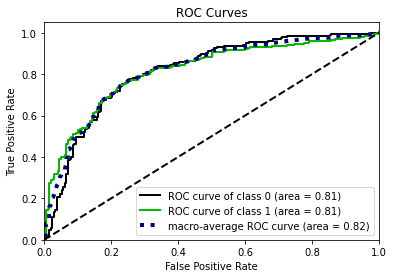

In [54]:
# Plotting the Roc Curve for O and 1

skplt.metrics.plot_roc(Y_wine_test, gnb.predict_proba(X_wine_test), plot_micro=False)
plt.show()

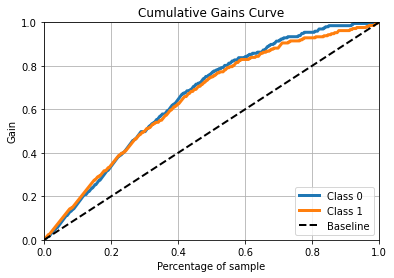

In [55]:
# Plotting the Cumulative gain curve for O and 1

skplt.metrics.plot_cumulative_gain(Y_wine_test, gnb.predict_proba(X_wine_test))
plt.show()

#### Hyperparameter

In [56]:
#Hyperparameter
model_Param = {'var_smoothing': np.logspace(10, -10, num = 200)}

gnb_1 = GaussianNB()

gnb_CV = GridSearchCV(gnb_1, model_Param, cv = 10, scoring = 'accuracy')

gnb_CV.fit(X_wine_train,Y_wine_train)



GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+10, 7.93409667e+09, 6.29498899e+09, 4.99450512e+09,
       3.96268864e+09, 3.14403547e+09, 2.49450814e+09, 1.97916687e+09,
       1.57029012e+09, 1.24588336e+09, 9.88495905e+08, 7.84282206e+08,
       6.22257084e+08, 4.93704785e+08, 3.91710149e+08, 3.10786619e+08,
       2.46581108e+08, 1.95639834e+08, 1.5...
       2.04907469e-08, 1.62575567e-08, 1.28989026e-08, 1.02341140e-08,
       8.11984499e-09, 6.44236351e-09, 5.11143348e-09, 4.05546074e-09,
       3.21764175e-09, 2.55290807e-09, 2.02550194e-09, 1.60705282e-09,
       1.27505124e-09, 1.01163798e-09, 8.02643352e-10, 6.36824994e-10,
       5.05263107e-10, 4.00880633e-10, 3.18062569e-10, 2.52353917e-10,
       2.00220037e-10, 1.58856513e-10, 1.26038293e-10, 1.00000000e-10])},
             scoring='accuracy')

In [57]:
gnb_CV.best_score_

0.7171491228070176

In [58]:
gnb_CV.best_params_

{'var_smoothing': 0.08804883581643447}

In [59]:
y_pred_CV = gnb_CV.predict(X_wine_test)

y_pred_p_CV = gnb_CV.predict_proba(X_wine_test)

In [60]:
# Importing scikit-learn metrics module for accuracy calculation

from sklearn import metrics

# Model Accuracy, how often is the classifier correct?

print("Accuracy:",metrics.accuracy_score(Y_wine_test,y_pred_CV))

Accuracy: 0.7524509803921569


In [61]:
# Calculating the Confusion matrix

confmat = pd.DataFrame(confusion_matrix(Y_wine_test, y_pred_CV), 
                       index=['True[0]', 'True[1]'], columns=['Predict[0]', 'Predict[1]'])
print("Confusion Matrix")
print(confmat)

Confusion Matrix
         Predict[0]  Predict[1]
True[0]         141          56
True[1]          45         166


In [62]:
# Calculating the f1 score

f1_score(Y_wine_test, y_pred_CV)

0.7667436489607391

In [63]:
# Calculating the Precision score 

precision_score(Y_wine_test, y_pred_CV)

0.7477477477477478

In [64]:
# Calculating recall score

recall_score(Y_wine_test, y_pred_CV)

0.7867298578199052

In [65]:
# Comparing all the metric values together

print(classification_report(Y_wine_test, y_pred_CV))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74       197
           1       0.75      0.79      0.77       211

    accuracy                           0.75       408
   macro avg       0.75      0.75      0.75       408
weighted avg       0.75      0.75      0.75       408



In [66]:
# Calculating the roc_auc score 

roc_auc_score(Y_wine_test, y_pred_p_CV[:,1])  #For true class i.e 1

0.8142276324969326

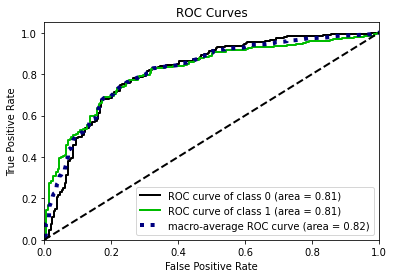

In [67]:
# Plotting the Roc curve for O and 1

skplt.metrics.plot_roc(Y_wine_test, gnb_CV.predict_proba(X_wine_test), plot_micro=False)
plt.show()

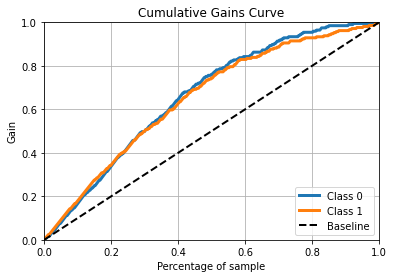

In [68]:
# Plotting the Cumulative gain curve for O and 1

skplt.metrics.plot_cumulative_gain(Y_wine_test, gnb_CV.predict_proba(X_wine_test))
plt.show()

## White Wine Data Set

In [69]:
#loading the white wine data set

wine_quality_white = pd.read_csv("winequality-white.csv")

In [70]:
# Checking the data set head

wine_quality_white.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [71]:
# Checking for the catagorical values

wine_quality_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [72]:
# Describing the White wine data set summary

wine_quality_white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


## Data Preprocessing 

#### Data preprocessing for White wine data set 

In [73]:
# Checking for Null values

wine_quality_white.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [74]:
# Checking for duplicate rows in the dataset

wine_quality_white=wine_quality_white.drop_duplicates()
wine_quality_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [75]:
# Renaming the column names by placing "_" in between the spaces

wine_quality_white = wine_quality_white.rename(columns={'fixed acidity':'fixed_acidity','residual sugar':'residual_sugar','free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide','citric acid':'citric_acid','volatile acidity':'volatile_acidity'})
wine_quality_white.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6


In [76]:
# Checking the column names if changed or not 

wine_quality_white.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [77]:
# Creating a copy of the dataset White wine

wine_quality_white_1 = wine_quality_white.copy()
wine_quality_white_1

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [78]:
# Checking the Unique elements of Quality

wine_quality_white['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9])

In [79]:
# Creating a Rating column for binomial classification of target variable "quality"

conditions = [
    (wine_quality_white_1['quality'] >= 6),
    (wine_quality_white_1['quality'] < 6)
]
rating = [1,0]
wine_quality_white_1['rating'] = np.select(conditions, rating)

In [80]:
# Checking the White wine data set head for the Binomial classification 

wine_quality_white_1.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,rating
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,1


In [81]:
# Checking the rating column mean

wine_quality_white_1.groupby('rating').mean()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
rating,,,,,,,,,,,,
0,6.956565,0.312700,0.332470,6.656194,0.052095,34.798591,147.455861,0.99497,3.173561,0.481825,9.909172,4.856825
1,6.778875,0.263946,0.335293,5.532357,0.042712,34.935897,131.899349,0.99318,3.206755,0.494749,10.940254,6.369690


In [82]:
# Separating the feature variables and the target variable

X_wine_quality_white =wine_quality_white_1.drop(['quality','rating'], axis = 1)
y_wine_quality_white = wine_quality_white_1['rating']

In [83]:
# Checking the X value head

X_wine_quality_white.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6


In [84]:
# Checking the Target variable head y

y_wine_quality_white.head()

0    1
1    1
2    1
3    1
6    1
Name: rating, dtype: int64

In [85]:
# Checking the good and bad quality of wine count

wine_quality_white_1['rating'].value_counts()

1    2613
0    1348
Name: rating, dtype: int64

In [86]:
# Normalizing feature variables to bring them to same scale

X_wine_quality_white = StandardScaler().fit_transform(X_wine_quality_white)

For the regression methods, we would use the the datasets as is and predict its quality

## Model on White Wine

#### Using Logestic regression

In [87]:
#importing all the libraries for the model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scikitplot as skplt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

import statsmodels.api as sm

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.metrics import roc_curve, roc_auc_score

In [88]:
# Training and test data in the ration of 7:3

X_Whitewine_train, X_Whitewine_test, Y_Whitewine_train,Y_Whitewine_test = train_test_split(X_wine_quality_white, y_wine_quality_white, test_size = 0.3, random_state = 3)


In [89]:
# Checking shape of the testing and training data set

print(X_Whitewine_train.shape,X_Whitewine_test.shape,Y_Whitewine_train.shape,Y_Whitewine_test.shape)

(2772, 11) (1189, 11) (2772,) (1189,)


In [90]:
# Calculating the accuracy of the prediction

White_wine_regressor=LogisticRegression()
White_wine_regressor.fit(X_Whitewine_train,Y_Whitewine_train)
score=White_wine_regressor.score(X_Whitewine_test,Y_Whitewine_test)
print('classification_accuracy ='+str(score))

classification_accuracy =0.7611438183347351


In [91]:
logistic = LogisticRegression(penalty='l2', C=1.0, random_state=None, solver='lbfgs')
logistic.fit(X_Whitewine_train,Y_Whitewine_train)

LogisticRegression()

In [92]:
# Calculating the probablity of prediction

y_pred = logistic.predict(X_Whitewine_test)
print(y_pred)

[0 0 1 ... 1 0 1]


In [93]:
# Calculating the Confusion matrix

confmat = pd.DataFrame(confusion_matrix(Y_Whitewine_test, y_pred), 
                       index=['True[0]', 'True[1]'], columns=['Predict[0]', 'Predict[1]'])
print("Confusion Matrix")
print(confmat)

Confusion Matrix
         Predict[0]  Predict[1]
True[0]         203         176
True[1]         108         702


In [94]:
# Calculating the f1 score

f1_score(Y_Whitewine_test, y_pred)

0.8317535545023698

In [95]:
# Calculating the Precision score 

precision_score(Y_Whitewine_test, y_pred)

0.7995444191343963

In [96]:
# Calculating the Recall score

recall_score(Y_Whitewine_test, y_pred)

0.8666666666666667

In [97]:
# Comparing all the metric values together

y_pred_p = logistic.predict_proba(X_Whitewine_test)
print(classification_report(Y_Whitewine_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.54      0.59       379
           1       0.80      0.87      0.83       810

    accuracy                           0.76      1189
   macro avg       0.73      0.70      0.71      1189
weighted avg       0.75      0.76      0.75      1189



In [98]:
# Calculating the roc_auc score 

roc_auc_score(Y_Whitewine_test, y_pred_p[:,1])  #For true class i.e 1

0.8121372031662268

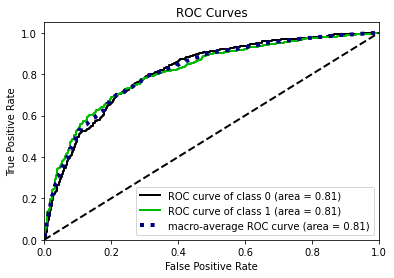

In [99]:
# Plotting the Roc curve for O and 1

skplt.metrics.plot_roc(Y_Whitewine_test, logistic.predict_proba(X_Whitewine_test), plot_micro=False)
plt.show()

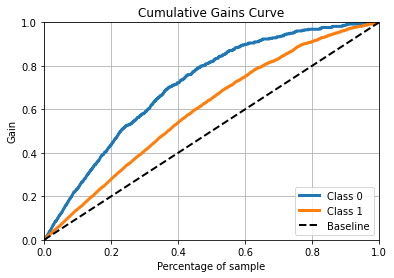

In [100]:
# Plotting the Cumulative gain curve for O and 1

skplt.metrics.plot_cumulative_gain(Y_Whitewine_test, logistic.predict_proba(X_Whitewine_test))
plt.show()

#### Naive bayes

In [101]:
from sklearn.naive_bayes import GaussianNB

X_Whitewine_train, X_Whitewine_test, Y_Whitewine_train,Y_Whitewine_test = train_test_split(X_wine_quality_white, y_wine_quality_white, test_size = 0.3, random_state = 2)
# X_train_white_reg, X_test_white_reg, y_train_white_reg, y_test_white_reg = train_test_split(X_white_reg, y_white_reg, test_size=.30, random_state=10)
#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_Whitewine_train,Y_Whitewine_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_Whitewine_test)

In [102]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_Whitewine_test,y_pred))

Accuracy: 0.7089991589571069


In [103]:
# Calculating the Confusion matrix

confmat = pd.DataFrame(confusion_matrix(Y_Whitewine_test, y_pred), 
                       index=['True[0]', 'True[1]'], columns=['Predict[0]', 'Predict[1]'])
print("Confusion Matrix")
print(confmat)

Confusion Matrix
         Predict[0]  Predict[1]
True[0]         226         185
True[1]         161         617


In [104]:
# Calculating the f1 score

f1_score(Y_Whitewine_test, y_pred)

0.781012658227848

In [105]:
# Calculating the Precision score 

precision_score(Y_Whitewine_test, y_pred)

0.7693266832917706

In [106]:
# Calculating the Recall score

recall_score(Y_Whitewine_test, y_pred)

0.7930591259640103

In [107]:
# Comparing all the metric values together

y_pred_p = gnb.predict_proba(X_Whitewine_test)
print(classification_report(Y_Whitewine_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.55      0.57       411
           1       0.77      0.79      0.78       778

    accuracy                           0.71      1189
   macro avg       0.68      0.67      0.67      1189
weighted avg       0.71      0.71      0.71      1189



In [108]:
# Calculating the roc_auc score 

roc_auc_score(Y_Whitewine_test, y_pred_p[:,1])  #For true class i.e 1

0.7592616916543136

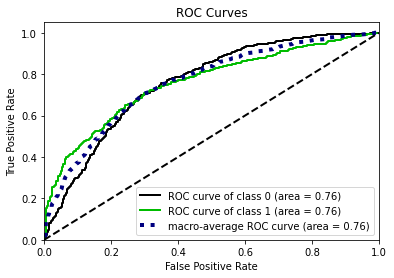

In [109]:
# Plotting the Roc curve for O and 1

skplt.metrics.plot_roc(Y_Whitewine_test, gnb.predict_proba(X_Whitewine_test), plot_micro=False)
plt.show()

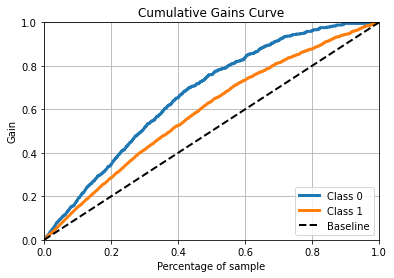

In [110]:
# Plotting the Cumulative gain curve for O and 1

skplt.metrics.plot_cumulative_gain(Y_Whitewine_test, gnb.predict_proba(X_Whitewine_test))
plt.show()